In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
# 2번째 합성곱-폴링 층을 추가 (거의 동일하나 필터만 64개로 늘린다.)

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
"""
  3차원의 특성을 일렬로 펼치기
  -> 마지막에 10개의 뉴런을 가진(밀집) 츨력층에서 확률을 계산하기 때문이다.
  여기서는 중간에 하나의 밀집 은닉층을 하나 더 두도록 하겠다.
"""

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) #은닉층과 출력층 사이에 드롭아웃을 넣어 드롭아웃 층이 은닉층의 과대적합을 막아 성능을 조금 더 계선해 줄 것이다.
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
# 모델 컴파일과 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.5350 - accuracy: 0.8096 - val_loss: 0.3428 - val_accuracy: 0.8724
Epoch 2/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.3554 - accuracy: 0.8727 - val_loss: 0.2903 - val_accuracy: 0.8935
Epoch 3/20
1500/1500 [==============================] - 67s 45ms/step - loss: 0.3075 - accuracy: 0.8889 - val_loss: 0.2647 - val_accuracy: 0.9031
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2755 - accuracy: 0.8997 - val_loss: 0.2482 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2504 - accuracy: 0.9084 - val_loss: 0.2337 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2300 - accuracy: 0.9160 - val_loss: 0.2285 - val_accuracy: 0.9178
Epoch 7/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2095 - accuracy: 0.9233 - val_loss: 0.2312 -

In [9]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [10]:
model.layers

In [11]:
"""
  첫번째 합성곱 층의 가중치를 조사
  층의 가중치와 절편은 층의 weights 속성에 저장
"""

conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 첫 번째(가중치)와 두 번째 원소(절편)의 크기를 출력

(3, 3, 1, 32) (32,)


In [12]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.019776579 0.24641764


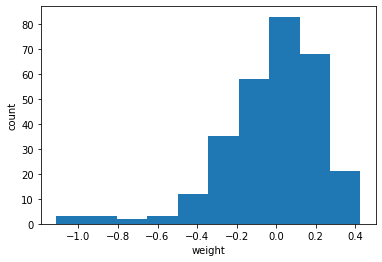

In [13]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

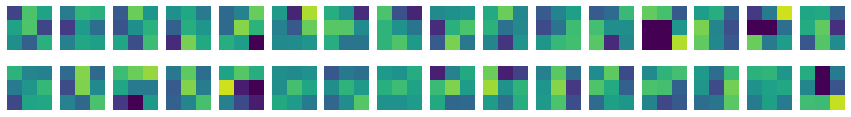

In [14]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [15]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [16]:
# 모델의 첫 번째 층(Conv2D)의 가중치를 no_training_conv 뱐승[ 저장]

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [17]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0017741813 0.080905214


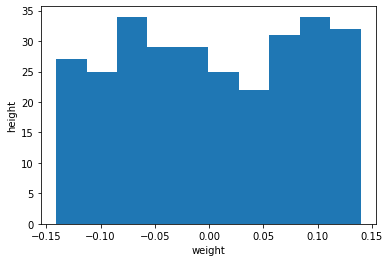

In [19]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

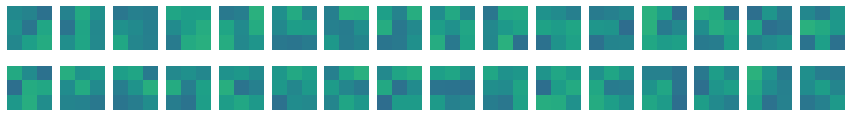

In [22]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [23]:
# 함수형 API 사용 방법

dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

hidden = dense1(inputs) # 입력값 inputs를 Dense층에 통과시킨 후 출력값 hidden을 만든다.

outpus = dense2(hidden) # 첫 번째 층의 출력을 입력으로 사용해 두 번째 층을 호출한다.

model = keras.Model(inputs, outputs) # inputs와 outputs을 Model 클래스로 연결한다.

inputs = keras.Input(shape=(784,))

In [27]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [28]:
# model.input 과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만든 수 있다.
conv_acti = keras.Model(model.input, model.layers[0].output) 

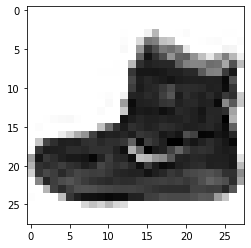

In [29]:
# 특성 맵 시각화
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [30]:
# 위  샘플을 conv_acti 모델을 주입하여 Conv2D 층이 만드는 특성 맵을 출력 (predict를 사용하려면 항상 1차원)

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [31]:
print(feature_maps.shape)

(1, 28, 28, 32)


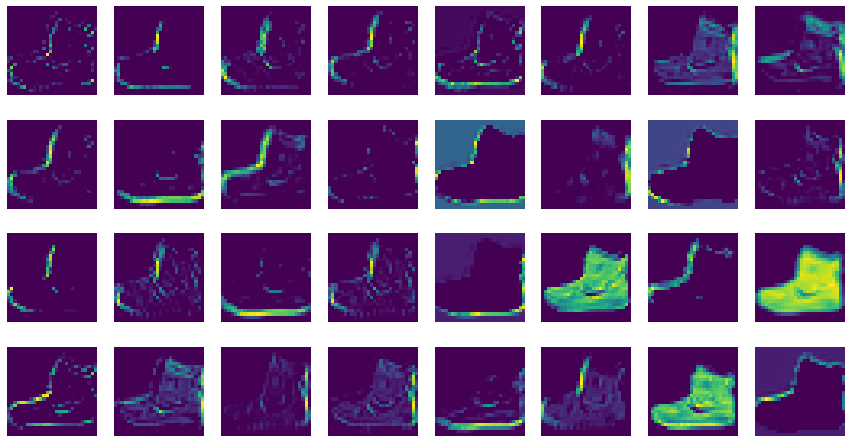

In [32]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i ,j].axis('off')
plt.show()

In [34]:
# 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델을 만든다.

conv2_acti = keras.Model(model.input, model.layers[2].output)

In [35]:
# 첫 본째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
inputs = train_input[0:1].reshape(-1, 28, 28 ,1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [36]:
print(feature_maps.shape)

(1, 14, 14, 64)


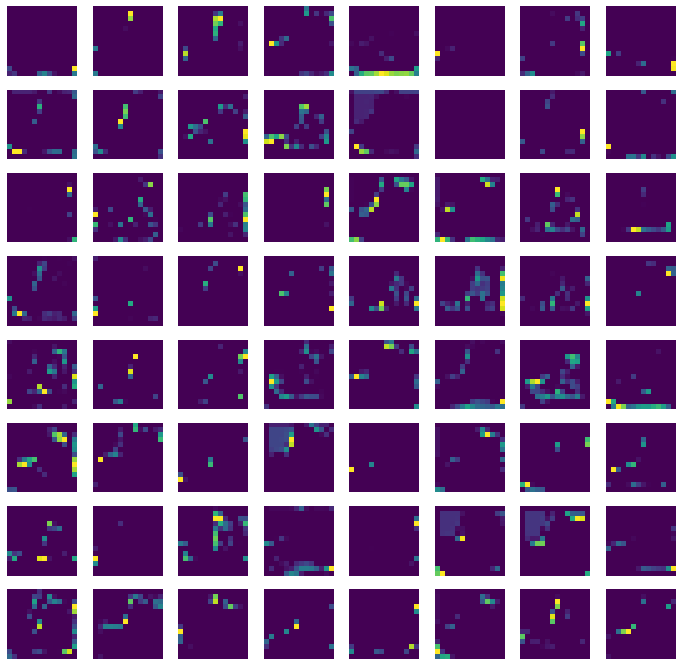

In [39]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()